
# Covid-19 Overview in Greece

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [New cases graph](#new_cases_graph)
* [New deaths graph](#new_deaths_graph)
* [Total cases graph](#total_cases_graph)
* [Total deaths graph](#total_deaths_graph)
* [Prediction of new deaths](#prediction_new_deaths)
* [Prediction of new cases](#prediction_new_cases)

# Introduction <a name="introduction"></a>



## Data <a name="data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy
import plotly
import folium
from folium import plugins
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from lime import lime_tabular
import plotly.express as px
import plotly.graph_objects as go
import os

In [2]:
#!wget -nv https://covid19.who.int/WHO-COVID-19-global-data.csv
#print('File downloaded!')
file_name=('cov.csv')
df_raw=pd.read_csv(file_name)
print('File copied to DataFrame!')
#os.remove("WHO-COVID-19-global-data.csv")
#print("File Removed!")

File copied to DataFrame!


In [3]:
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,intubated
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,NaN
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,NaN
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,NaN
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,NaN
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,NaN


#### Removing data from all the countries except Greece

In [4]:
df_raw=df_raw[df_raw['Country'].str.contains('Greece')]
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,intubated
28269,2020-01-03,GR,Greece,EURO,0,0,0,0,NaN
28270,2020-01-04,GR,Greece,EURO,0,0,0,0,NaN
28271,2020-01-05,GR,Greece,EURO,0,0,0,0,NaN
28272,2020-01-06,GR,Greece,EURO,0,0,0,0,NaN
28273,2020-01-07,GR,Greece,EURO,0,0,0,0,NaN


#### Removing unnecessary data columns

In [5]:
df_raw.drop(columns=["Country_code", "WHO_region", "Country"], inplace=True)
df_raw.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,intubated
28269,2020-01-03,0,0,0,0,NaN
28270,2020-01-04,0,0,0,0,NaN
28271,2020-01-05,0,0,0,0,NaN
28272,2020-01-06,0,0,0,0,NaN
28273,2020-01-07,0,0,0,0,NaN


#### Renaming columns

In [6]:
df_raw=df_raw.rename(columns={"Cumulative_cases": "Total_cases", "Cumulative_deaths": "Total_deaths"})
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths,intubated
28269,2020-01-03,0,0,0,0,NaN
28270,2020-01-04,0,0,0,0,NaN
28271,2020-01-05,0,0,0,0,NaN
28272,2020-01-06,0,0,0,0,NaN
28273,2020-01-07,0,0,0,0,NaN


#### Sorting the dataframe by Date

In [7]:
df_raw=df_raw.sort_values(by='Date_reported', ascending=False)
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths,intubated
28628,2020-12-27,262,135114,46,4553,473.0
28627,2020-12-26,617,134852,50,4507,470.0
28626,2020-12-25,873,134235,55,4442,476.0
28625,2020-12-24,934,133435,62,4384,495.0
28624,2020-12-23,853,132501,83,4322,491.0


#### Converting 'Date_reported' to datetime

In [8]:
df_raw.Date_reported = pd.to_datetime(df_raw.Date_reported).dt.date

In [9]:
df_raw.head(10)

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths,intubated
28628,2020-12-27,262,135114,46,4553,473.0
28627,2020-12-26,617,134852,50,4507,470.0
28626,2020-12-25,873,134235,55,4442,476.0
28625,2020-12-24,934,133435,62,4384,495.0
28624,2020-12-23,853,132501,83,4322,491.0
28623,2020-12-22,526,131648,85,4239,505.0
28622,2020-12-21,588,131122,70,4154,515.0
28621,2020-12-20,901,130534,58,4084,534.0
28620,2020-12-19,916,129633,96,4026,527.0
28619,2020-12-18,1155,128717,78,3948,542.0


#### Correcting the deviation of the day

In [10]:
df_copy = df_raw.copy()
df_copy['Date_reported']=df_copy['Date_reported'].shift(-1)
df_copy.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths,intubated
28628,2020-12-26,262,135114,46,4553,473.0
28627,2020-12-25,617,134852,50,4507,470.0
28626,2020-12-24,873,134235,55,4442,476.0
28625,2020-12-23,934,133435,62,4384,495.0
28624,2020-12-22,853,132501,83,4322,491.0


In [11]:
df_copy = df_copy.iloc[:-324]

In [12]:
df_copy=df_copy.sort_values(by='Total_cases', ascending=True)
df_copy.intubated = df_copy.intubated.astype(int)

In [13]:
df_copy.style.background_gradient(cmap='Reds')

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths,intubated
28593,2020-11-21,2309,90121,108,1527,522
28594,2020-11-22,1498,91619,103,1630,540
28595,2020-11-23,1387,93006,84,1714,549
28596,2020-11-24,2131,95137,101,1815,562
28597,2020-11-25,2151,97288,87,1902,597
28598,2020-11-26,2018,99306,99,2001,608
28599,2020-11-27,1981,101287,101,2102,607
28600,2020-11-28,1747,103034,121,2223,606
28601,2020-11-29,1193,104227,98,2321,603
28602,2020-11-30,1044,105271,85,2406,600


# New cases graph<a name="new_cases_graph"></a>

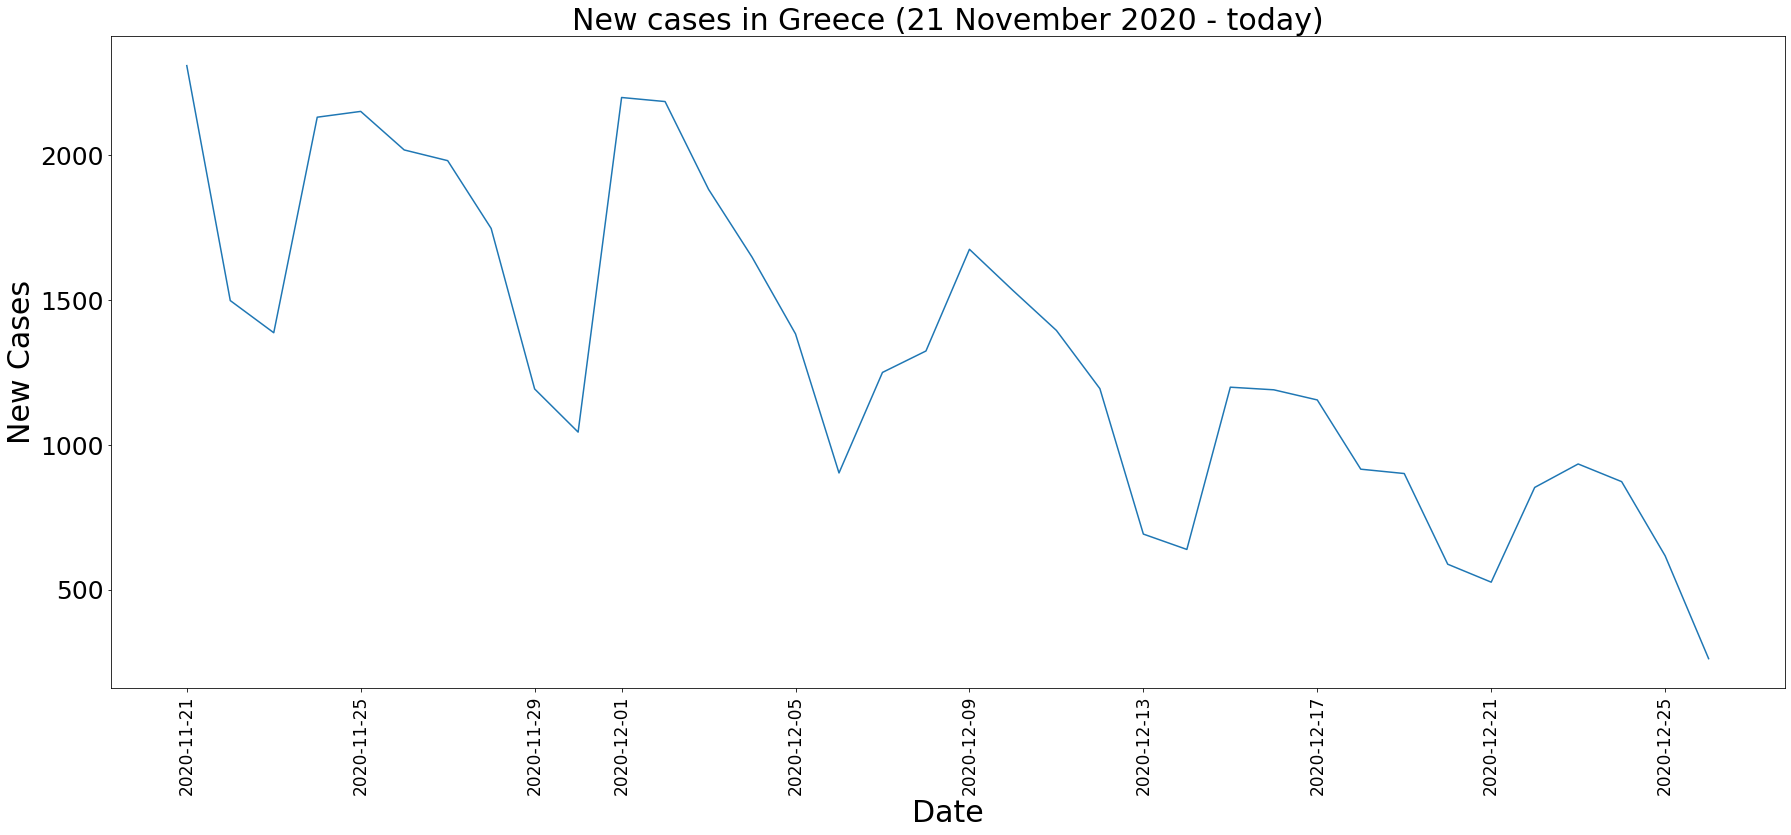

In [14]:
plt.figure(figsize=(30,12))
plt.title('New cases in Greece (21 November 2020 - today)', fontsize=30)
plt.ylabel('New Cases', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['New_cases'])

# New deaths graph<a name="new_deaths_graph"></a>

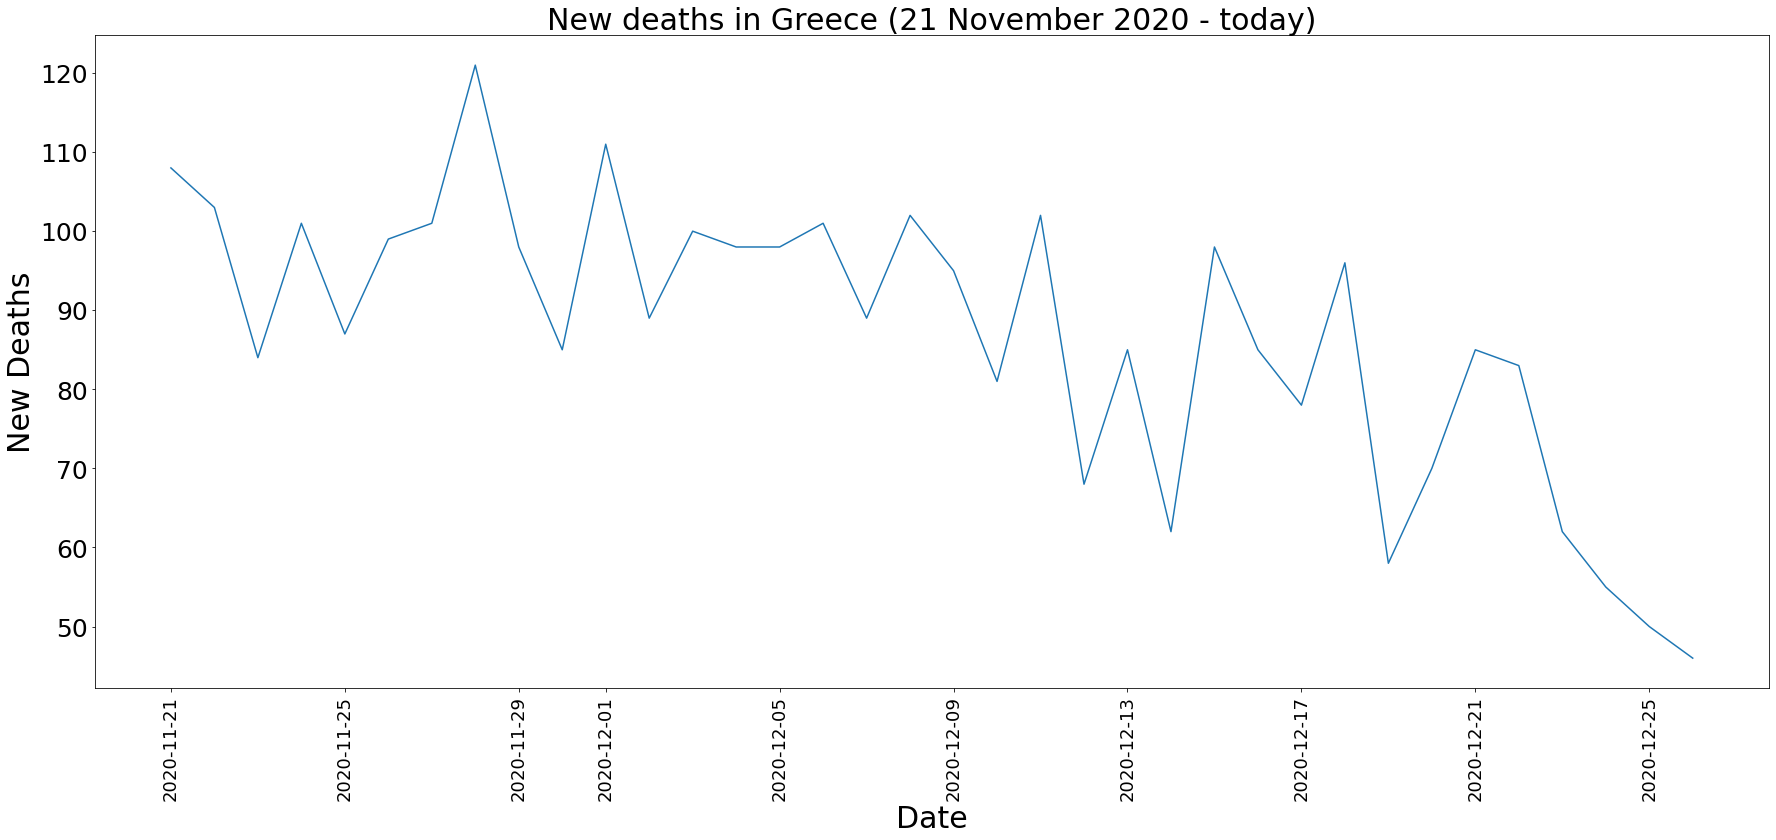

In [15]:
plt.figure(figsize=(30,12))
plt.title('New deaths in Greece (21 November 2020 - today)',fontsize=30)
plt.ylabel('New Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=25)
plt.tick_params(axis='x', labelsize=18)
plt.plot(df_copy['Date_reported'], df_copy['New_deaths'])

# Total cases graph<a name="total_cases_graph"></a>

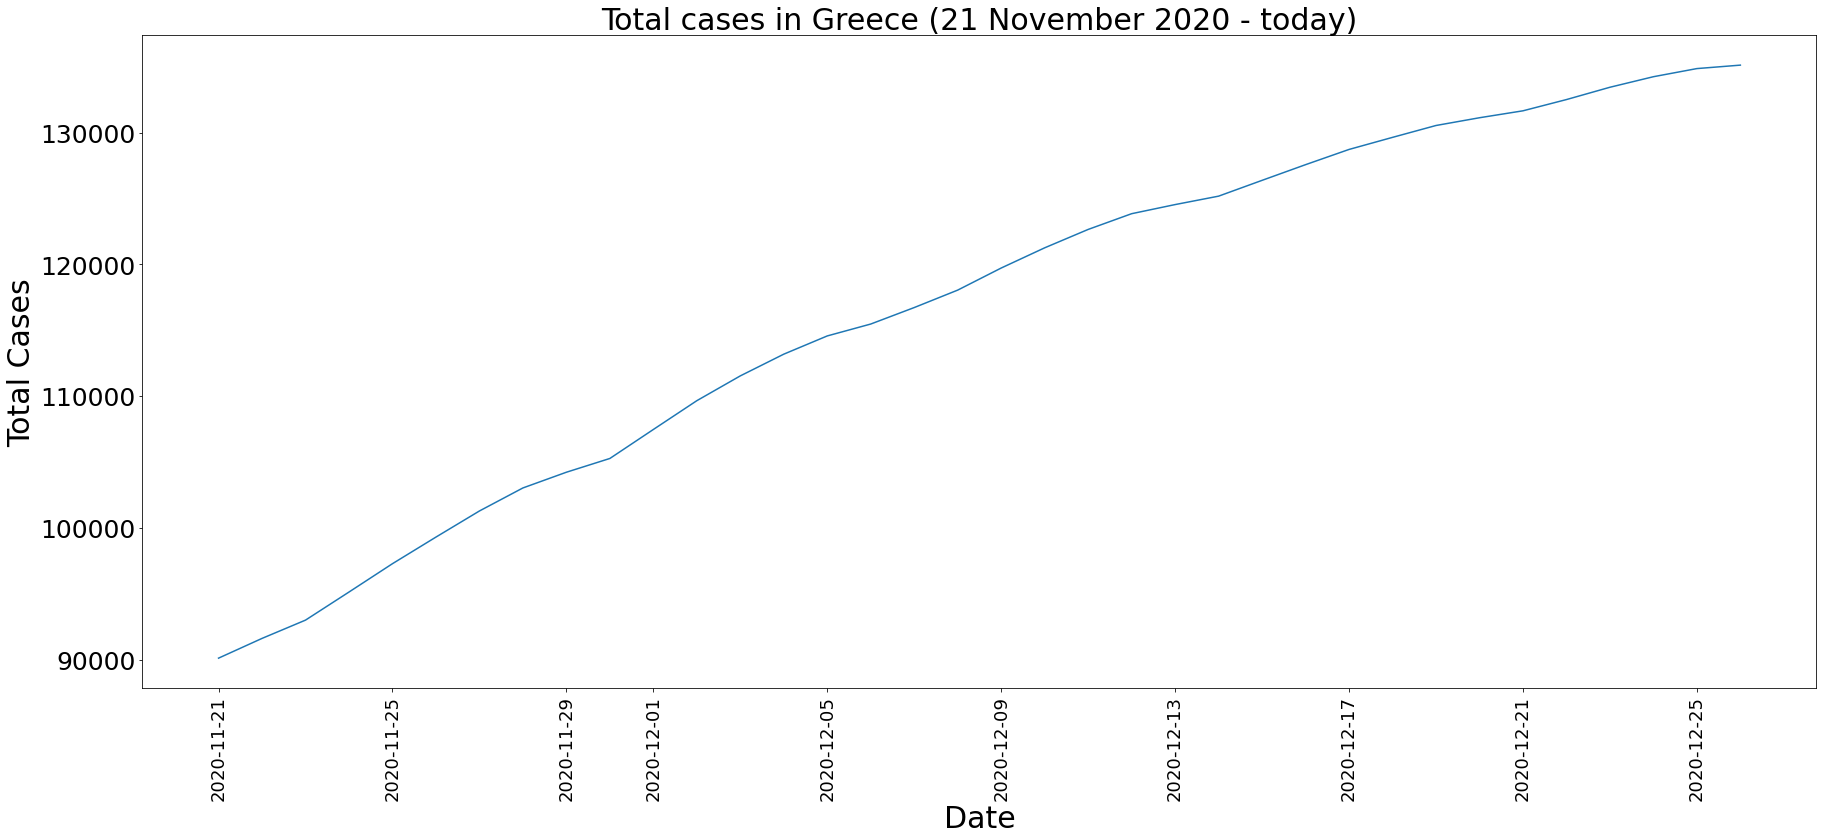

In [16]:
plt.figure(figsize=(30,12))
plt.title('Total cases in Greece (21 November 2020 - today)',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_cases'])

# Total deaths graph<a name="total_deaths_graph"></a>

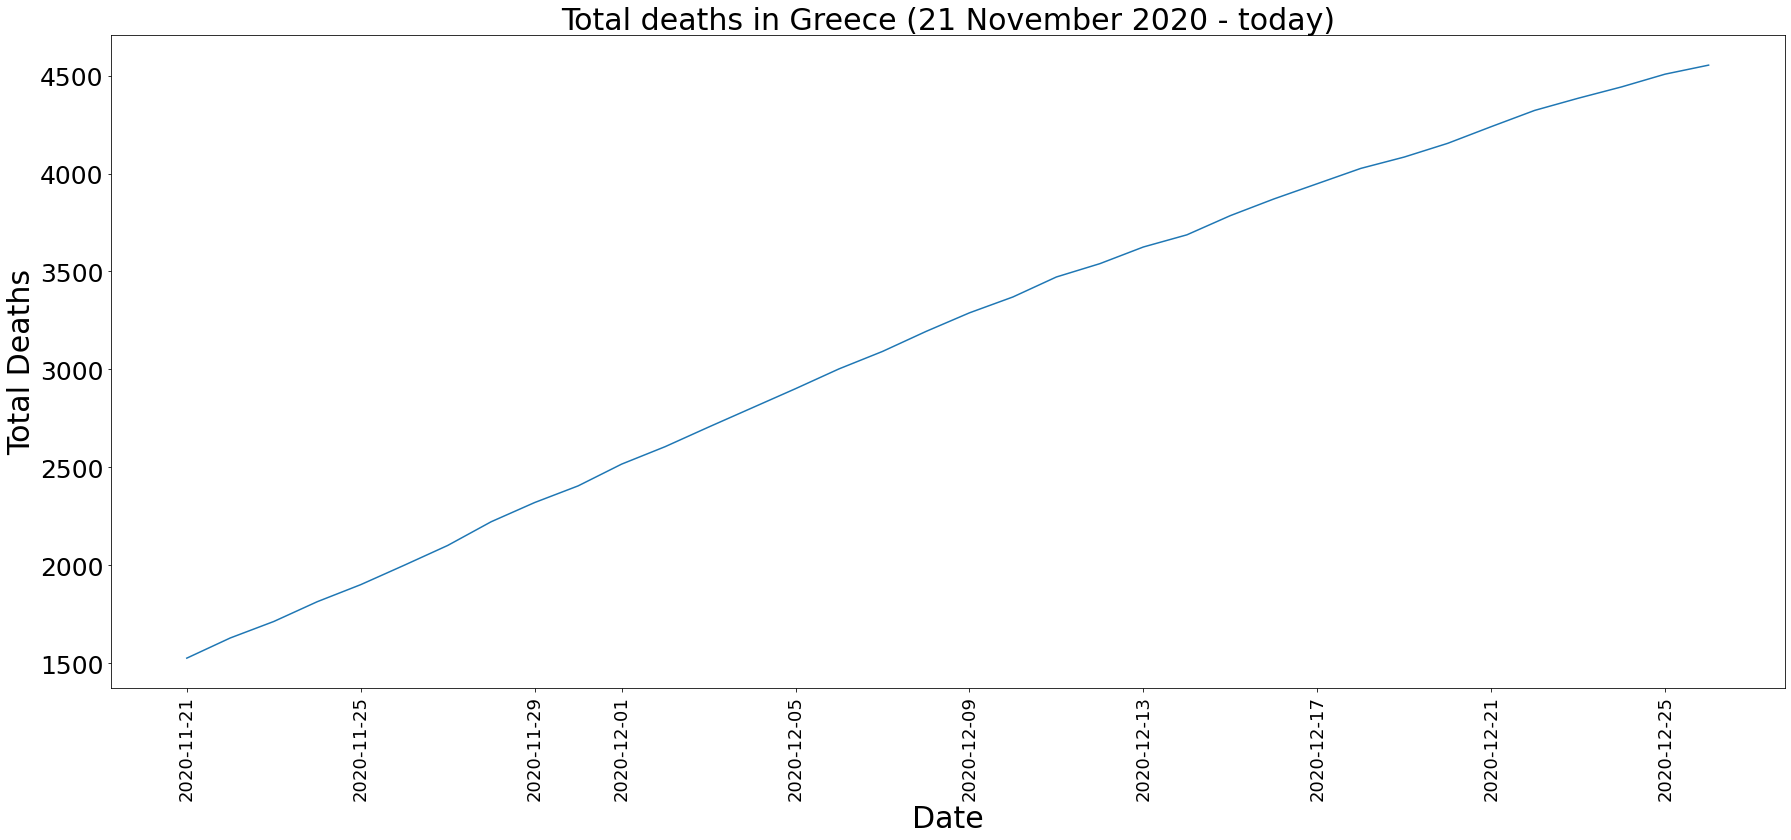

In [17]:
plt.figure(figsize=(30,12))
plt.title('Total deaths in Greece (21 November 2020 - today)',fontsize=30)
plt.ylabel('Total Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_deaths'])

# Ιntubated Graph

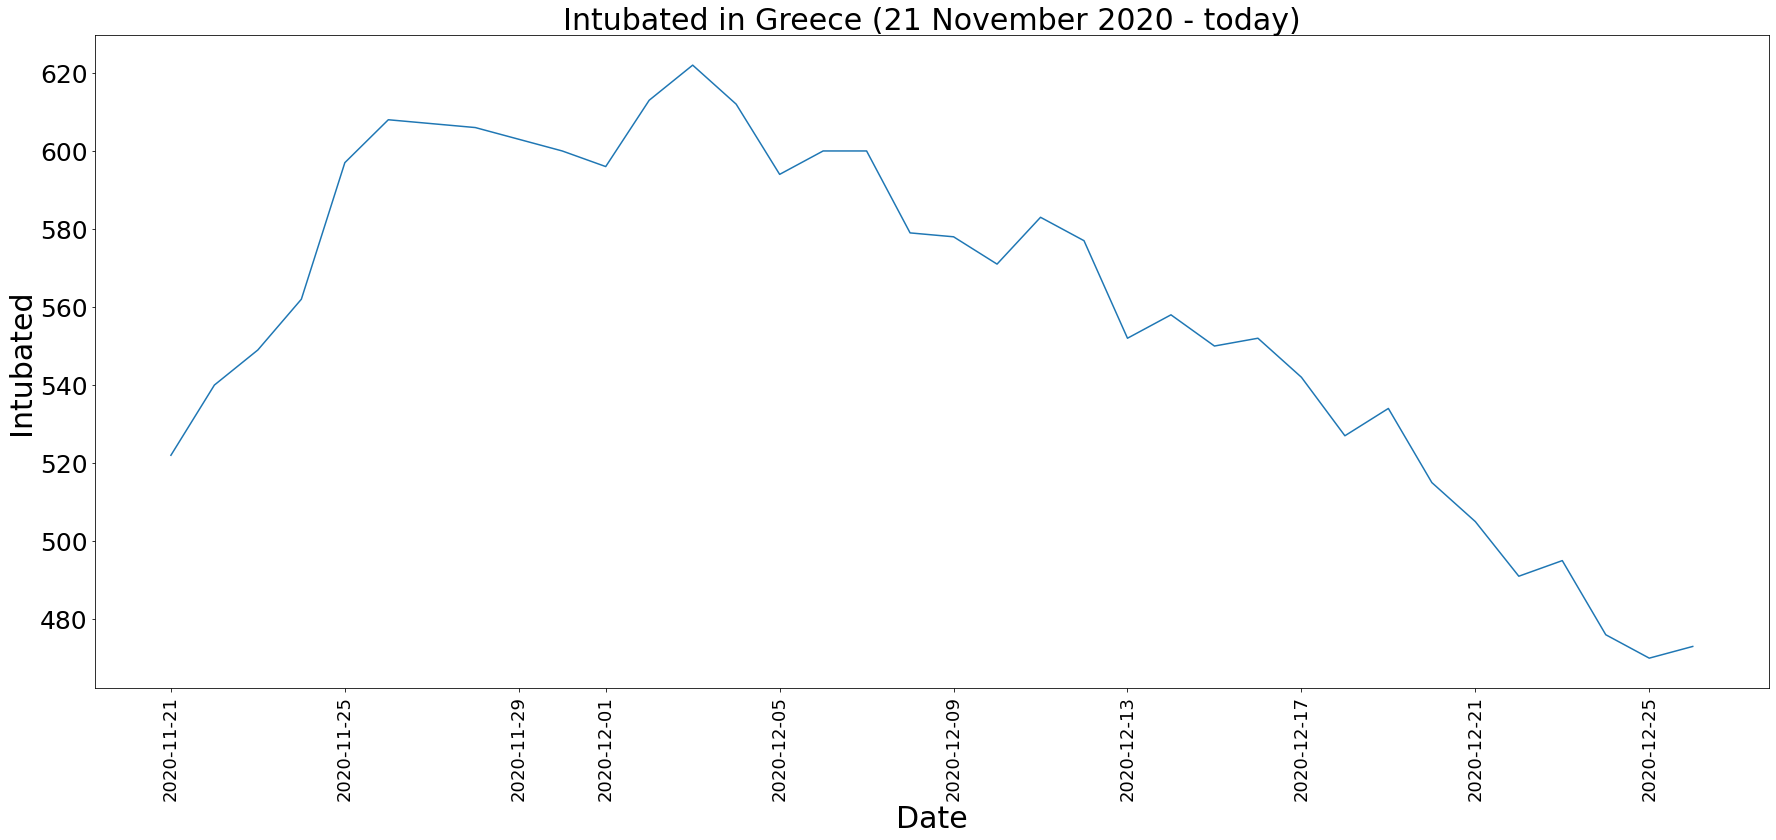

In [18]:
plt.figure(figsize=(30,12))
plt.title('Intubated in Greece (21 November 2020 - today)',fontsize=30)
plt.ylabel('Intubated',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['intubated'])

## Using Prophet to predict covid-19 behavior to 1 week from today

In [19]:
from fbprophet import Prophet

In [20]:
new_cases=df_copy.groupby('Date_reported').sum()['New_cases'].reset_index()
new_deaths=df_copy.groupby('Date_reported').sum()['New_deaths'].reset_index()
intubated=df_copy.groupby('Date_reported').sum()['intubated'].reset_index()

## Prediction of new deaths <a name="prediction_new_deaths"></a>

In [21]:
new_deaths.tail()

,Date_reported,New_deaths
31,2020-12-22,83
32,2020-12-23,62
33,2020-12-24,55
34,2020-12-25,50
35,2020-12-26,46


In [22]:
new_deaths.columns=['ds','y']

In [23]:
m=Prophet(interval_width=0.95)
m.fit(new_deaths)
future_new_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
forecast_new_deaths=m.predict(future_new_deaths)
forecast_new_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
36,2020-12-27,65.037599,43.753743,85.836925
37,2020-12-28,54.638056,33.722064,75.169407
38,2020-12-29,72.636037,51.400544,93.803533
39,2020-12-30,57.237169,37.218595,78.902653


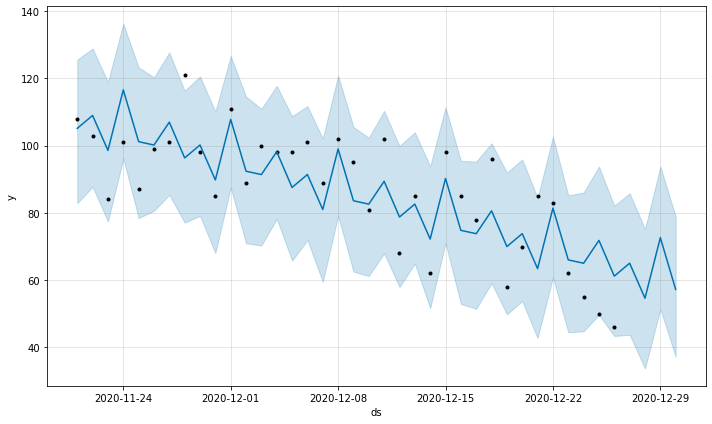

In [25]:
forecast_new_deaths_plot=m.plot(forecast_new_deaths)

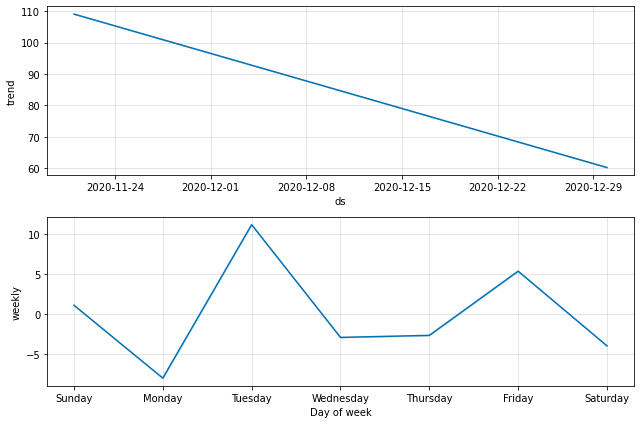

In [26]:
forecast_new_deaths_plot=m.plot_components(forecast_new_deaths)

## Prediction of new cases<a name="prediction_new_cases"></a>

In [27]:
new_cases.tail()

,Date_reported,New_cases
31,2020-12-22,853
32,2020-12-23,934
33,2020-12-24,873
34,2020-12-25,617
35,2020-12-26,262


In [28]:
new_cases.columns=['ds','y']

In [30]:
m=Prophet(interval_width=0.95)
m.fit(new_cases)
future_new_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
forecast_new_cases=m.predict(future_new_cases)
forecast_new_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
36,2020-12-27,30.729365,-260.722475,314.848917
37,2020-12-28,25.131380,-251.284829,290.023408
38,2020-12-29,597.135067,313.409738,876.441472
39,2020-12-30,682.937566,407.895295,954.262714


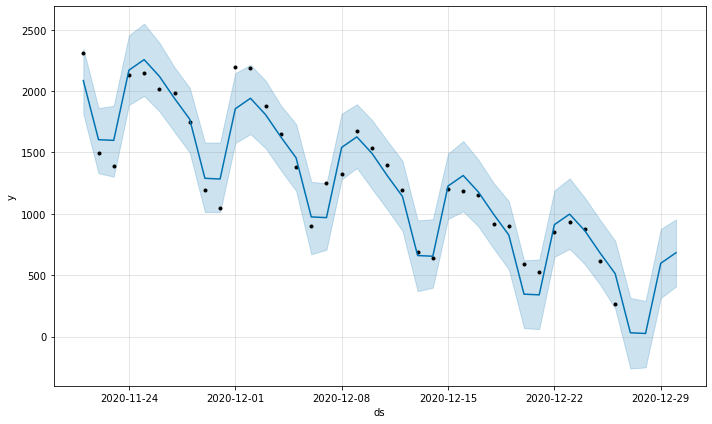

In [32]:
forecast_new_cases_plot=m.plot(forecast_new_cases)

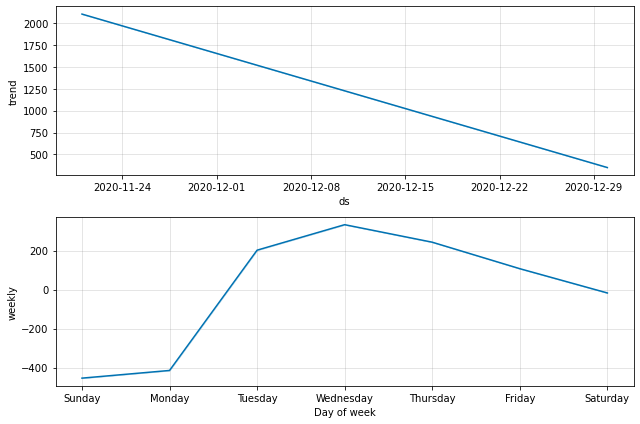

In [33]:
forecast_new_cases_plot=m.plot_components(forecast_new_cases)

# Predictions of intubated

In [34]:
intubated.tail()

,Date_reported,intubated
31,2020-12-22,491
32,2020-12-23,495
33,2020-12-24,476
34,2020-12-25,470
35,2020-12-26,473


In [35]:
intubated.columns=['ds','y']

In [36]:
m=Prophet(interval_width=0.95)
m.fit(intubated)
future_intubated=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
forecast_intubated=m.predict(future_intubated)
forecast_intubated[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
36,2020-12-27,455.273000,444.668563,466.341385
37,2020-12-28,447.755975,436.529434,459.333642
38,2020-12-29,433.045900,420.604405,445.123685
39,2020-12-30,436.924686,422.617816,452.092352


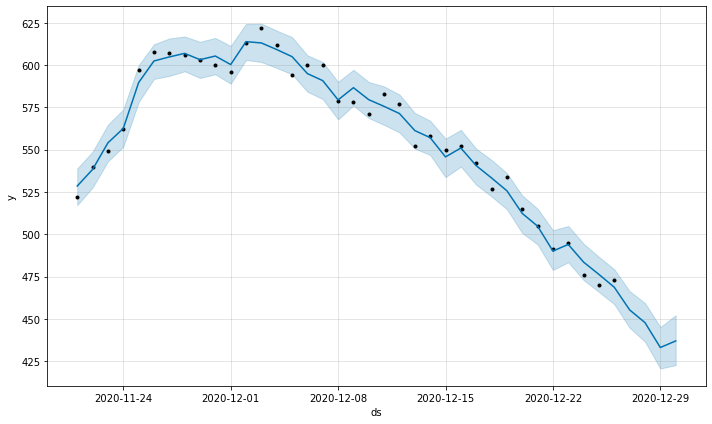

In [38]:
forecast_intubated_plot=m.plot(forecast_intubated)

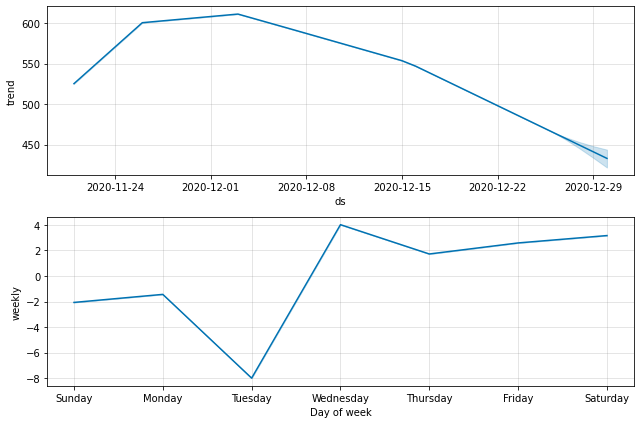

In [39]:
forecast_intubated_plot=m.plot_components(forecast_intubated)